In [59]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import random
random.seed(10)

In [60]:
data = pd.read_excel('Data_Train.xlsx')

In [61]:
data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [63]:
data_length = len(data)
print('Percentage of null values in CITY : {:,.2f}%'.format(data.CITY.isnull().sum() * 100 / data_length))
print('Percentage of null values in LOCALITY : {:,.2f}%'.format(data.LOCALITY.isnull().sum() * 100 / data_length))
print('Percentage of null values in RATING : {:,.2f}%'.format(data.RATING.isnull().sum() * 100 / data_length))
print('Percentage of null values in VOTES : {:,.2f}%'.format(data.VOTES.isnull().sum() * 100 / data_length))

Percentage of null values in CITY : 0.88%
Percentage of null values in LOCALITY : 0.77%
Percentage of null values in RATING : 0.02%
Percentage of null values in VOTES : 9.49%


In [64]:
data.dropna(subset=['CITY'],inplace=True)
data.dropna(subset=['LOCALITY'],inplace=True)
data.dropna(subset=['RATING'],inplace=True)

In [65]:
data.duplicated(subset=['RESTAURANT_ID','CITY','TITLE','CUISINES','LOCALITY']).sum()

25

In [66]:
data.drop_duplicates(subset=['RESTAURANT_ID','CITY','TITLE','CUISINES','LOCALITY'],keep='first',inplace=True)

In [67]:
data.drop(columns=['RESTAURANT_ID'],inplace=True)

In [68]:
for i in data.drop(columns=['COST']).columns:
  print(i)
  print(data[i].nunique())
  print(data[i].value_counts(),end='\n\n')

TITLE
113
QUICK BITES                    4202
CASUAL DINING                  3635
None                            920
CAFÉ                            602
DESSERT PARLOR                  380
                               ... 
BAKERY,CONFECTIONERY              1
LOUNGE,FINE DINING                1
BAKERY,BEVERAGE SHOP              1
BAR,CLUB                          1
BEVERAGE SHOP,CASUAL DINING       1
Name: TITLE, Length: 113, dtype: int64

CUISINES
4121
South Indian                                             531
North Indian                                             516
North Indian, Chinese                                    496
Fast Food                                                284
Chinese                                                  166
                                                        ... 
Beverages, Salad, Healthy Food, Juices                     1
North Indian, Biryani, Chinese, Kebab, Mughlai, Asian      1
Fast Food, Juices, South Indian, Ice Cream          

In [69]:
df_title = data.TITLE.agg(lambda x: pd.Series(1,(set(x.strip().lower().replace(' ','').split(','))))).fillna(0)
df_title.columns = ['title_'+i for i in df_title.columns]
df_title.drop(columns=['title_none'],inplace=True)
df_title.reset_index(drop=True,inplace=True)
df_title.head()

,title_casualdining,title_bar,title_quickbites,title_dessertparlor,title_café,title_microbrewery,title_beverageshop,title_iranicafe,title_bakery,title_pub,...,title_foodcourt,title_foodtruck,title_mess,title_kiosk,title_club,title_confectionery,title_dhaba,title_meatshop,title_cocktailbar,title_paanshop
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
df_cuisines = data.CUISINES.agg(lambda x: pd.Series(1,(set(x.strip().lower().replace(' ','').split(','))))).fillna(0)
df_cuisines.columns = ['cuisines_'+i for i in df_cuisines.columns]
df_cuisines.drop(columns=['cuisines_'],inplace=True)
df_cuisines.reset_index(drop=True,inplace=True)
df_cuisines.head()

,cuisines_malwani,cuisines_goan,cuisines_northindian,cuisines_japanese,cuisines_asian,cuisines_modernindian,cuisines_chinese,cuisines_biryani,cuisines_hyderabadi,cuisines_tibetan,...,cuisines_pakistani,cuisines_peruvian,cuisines_cuisinevaries,cuisines_irish,cuisines_multicuisine,cuisines_jewish,cuisines_vegan,cuisines_oriental,cuisines_modernaustralian,cuisines_egyptian
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
data.CITY.agg(lambda x: pd.Series(1,(set(x.strip().lower().replace(' ','').split(','))))).fillna(0).sum().sort_values().tail(25).to_frame().T

,delhi,delhincr,dwarka,kerala,ernakulam,kakkanad,india,greaternoida,bengaluru,andheriwest,...,navimumbai,noida,secunderabad,gurgaon,kochi,newdelhi,mumbai,hyderabad,bangalore,chennai
0,8.0,9.0,10.0,10.0,14.0,15.0,23.0,31.0,42.0,47.0,...,165.0,211.0,310.0,377.0,1279.0,1317.0,1713.0,1819.0,2145.0,2175.0


In [72]:
# !pip install fuzzywuzzy

In [73]:
from fuzzywuzzy import process
 
names_array=[]
def match_names(wrong_names,correct_names):
    for row in wrong_names:
        x=process.extractOne(row, correct_names)
        if x[1]<60:
            names_array.append('Others')
        else:
            names_array.append(x[0])
    return names_array

In [74]:
cities = ['Bangalore','Thane','Bandra','Hyderabad','Andheri','Delhi','Chennai', 'Bandra','Mumbai',
               'Kochi', 'Noida', 'Gurgaon','Faridabad', 'Ghaziabad','Secunderabad']
data.loc[:,'CITY'] = match_names((data.CITY.astype(str) + ' ' + data.LOCALITY.astype(str)),cities)

In [75]:
df_city = data.CITY.agg(lambda x: pd.Series(1,(set(x.strip().lower().replace(' ','').split(','))))).fillna(0)
df_city.drop(columns=['others'],inplace=True)
df_city.reset_index(drop=True,inplace=True)
df_city.head()

,thane,chennai,bandra,mumbai,bangalore,gurgaon,hyderabad,kochi,andheri,delhi,noida,secunderabad,faridabad,ghaziabad
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
data.drop(columns=['LOCALITY'],inplace=True)

In [77]:
data['RATING'].replace({'NEW':'1','-':'1'},inplace=True)
data['RATING'] = list(data.groupby('CITY').RATING.transform(lambda x: x.fillna(x.mode())))
data['RATING'] = data['RATING'].astype(float)

In [78]:
data['VOTES'].fillna(0,inplace=True)
data['VOTES'] = list(data.VOTES.agg(lambda x: str(x).strip().split(' ')[0]))
data['VOTES'] = data['VOTES'].astype(float)

In [79]:
import re

In [80]:
df_time = data.TIME.agg(lambda x: pd.Series(1,(set(re.findall('([NA]{2}|[c][l][o][s][e][d]\s\(\w+\)|[c][l][o][s][e][d]|\(\w+?\W\w*\)|[a-z]{3})',str(x).lower().replace('noon','pm').replace('midnight','am').replace('24 hours','24').replace('not available','NA')))))).fillna(0)
df_time.reset_index(drop=True,inplace=True)
df_time.head()

,(mon-sun),sun,mon,tue,thu,fri,sat,wed,closed (mon),(tue-sun),...,NA,(mon-tue),(thu-sun),closed (tue),closed (sat),(fri-sat),(tue-thu),(thu-sat),(wed-sat),closed (wed)
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
df_days_open = pd.DataFrame(np.zeros((len(df_time),8)),columns=['mon','tue','wed','thu','fri','sat','sun','NA'])
for i in list(df_time.columns):
    l = re.findall('[NA]{2}|[closed]{5}|[a-z]{3}',i)
    if len(l) > 1 and l[0] != 'close':
        df_days_open.loc[df_time[i]==1,l[0]:l[1]] = 1
    if len(l) > 1 and l[0] == 'close':
        df_days_open.loc[df_time[i]==1,l[1]] = 0
    if len(l) == 1 and l[0] not in ['close','NA']:
        df_days_open.loc[df_time[i]==1,l[0]] = 1
    if len(l) == 1 and l[0] == 'NA':
        df_days_open.loc[df_time[i]==1,'NA'] = 1

In [82]:
df_days_open.head()

,mon,tue,wed,thu,fri,sat,sun,NA
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [83]:
data.drop(columns=['TIME'],inplace=True)

In [84]:
data.isnull().sum()

TITLE       0
CUISINES    0
CITY        0
RATING      0
VOTES       0
COST        0
dtype: int64

In [85]:
data.reset_index(drop=True,inplace=True)

In [86]:
data.head()

,TITLE,CUISINES,CITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian",Thane,3.6,49.0,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",Chennai,4.2,30.0,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,3.8,221.0,800
3,QUICK BITES,"Tibetan, Chinese",Bandra,4.1,24.0,800
4,DESSERT PARLOR,Desserts,Mumbai,3.8,165.0,300


In [87]:
data.shape

(12550, 6)

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
sns.set_context('notebook')

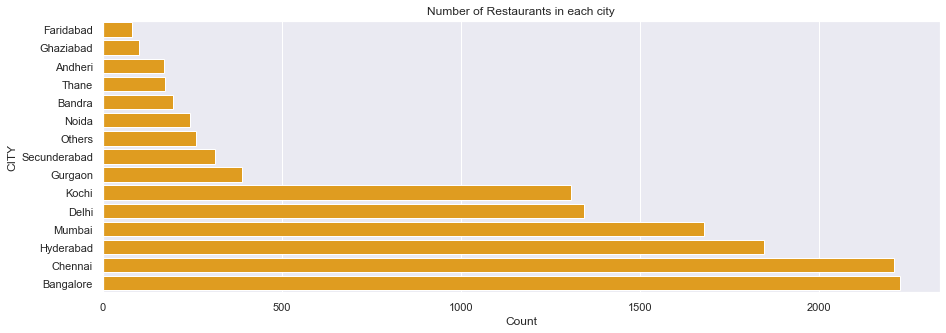

In [89]:
plt.figure(figsize=(15,5))
sns.barplot(data=data.groupby('CITY',as_index=False).count().sort_values('TITLE'),y='CITY',x='TITLE',color='orange')
plt.xlabel('Count')
plt.title('Number of Restaurants in each city')
plt.show()

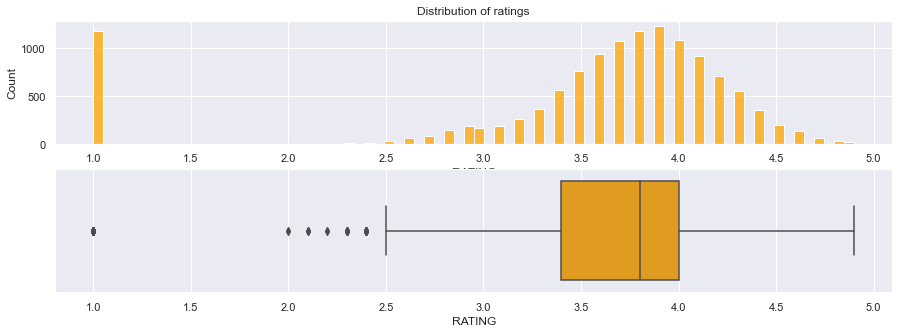

In [90]:
plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
sns.histplot(data=data,x='RATING',color='orange')
plt.title('Distribution of ratings')
plt.subplot(2,1,2)
sns.boxplot(data=data,x='RATING',color='orange')
plt.show()

In [91]:
data[(data.RATING < 2.5) & (data.RATING > 1)]

,TITLE,CUISINES,CITY,RATING,VOTES,COST
994,CASUAL DINING,"Chinese, North Indian",Chennai,2.4,215.0,700
1005,QUICK BITES,Arabian,Hyderabad,2.3,278.0,500
1791,CASUAL DINING,"Thai, Chinese, North Indian, South Indian",Chennai,2.4,422.0,800
2160,CASUAL DINING,"Chettinad, Chinese, North Indian, South Indian",Chennai,2.4,60.0,700
3133,None,"North Indian, South Indian, Biryani",Hyderabad,2.3,221.0,500
3360,CASUAL DINING,"North Indian, Chinese",Hyderabad,2.3,63.0,600
3453,QUICK BITES,Chinese,Hyderabad,2.4,127.0,300
3489,"CASUAL DINING,BAR","North Indian, Chinese, Italian, Thai, Biryani",Andheri,2.4,59.0,1800
4357,QUICK BITES,"Italian, Chinese, Beverages",Hyderabad,2.4,63.0,300
4365,QUICK BITES,Street Food,Hyderabad,2.3,105.0,150


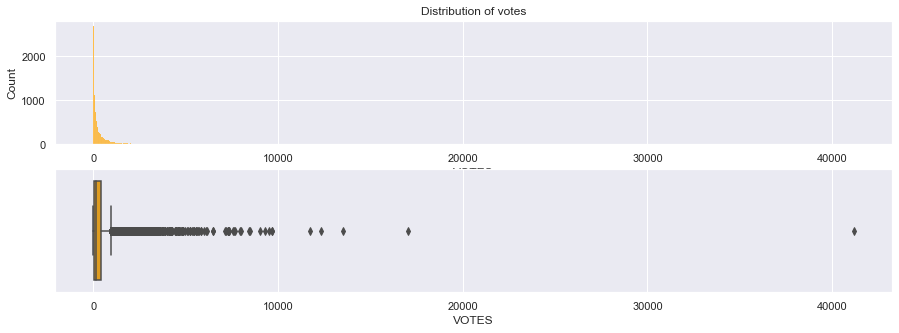

In [92]:
plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
sns.histplot(data=data,x='VOTES',color='orange')
plt.title('Distribution of votes')
plt.subplot(2,1,2)
sns.boxplot(data=data,x='VOTES',color='orange')
plt.show()

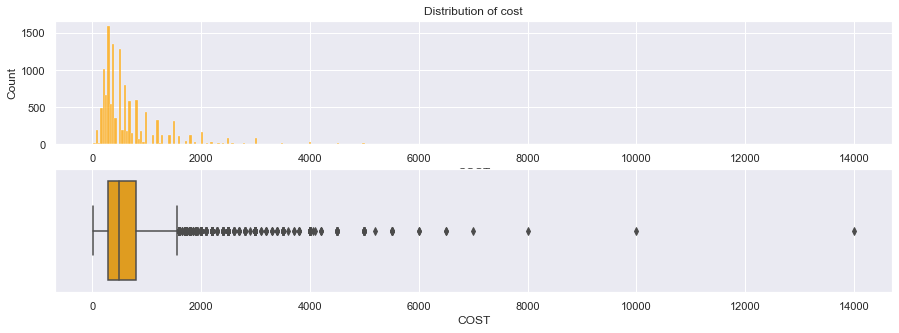

In [93]:
plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
sns.histplot(data=data,x='COST',color='orange')
plt.title('Distribution of cost')
plt.subplot(2,1,2)
sns.boxplot(data=data,x='COST',color='orange')
plt.show()

In [94]:
from skew_autotransform import skew_autotransform
from sklearn.preprocessing import MinMaxScaler


 ------------------------------------------------------

 'RATING' had 'negative' skewness of -1.88

 Transformation yielded skewness of -0.49


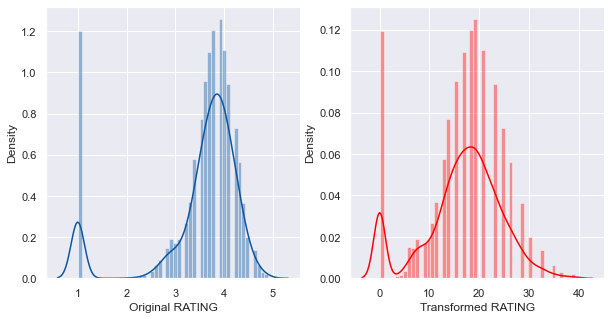

In [95]:
transform_rating = skew_autotransform(data[['RATING']].copy(deep=True), plot = True, exp = False, threshold = 0.5)


 ------------------------------------------------------

 'VOTES' had 'positive' skewness of 14.48

 Transformation yielded skewness of -0.08


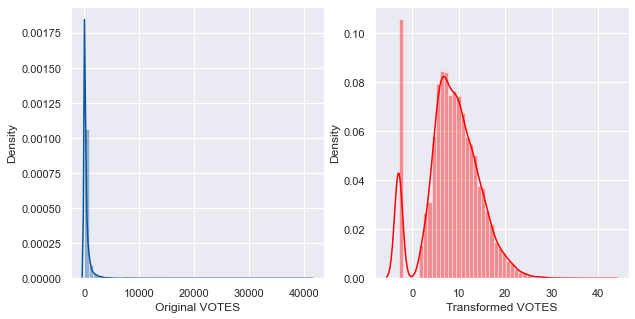

In [96]:
transform_votes = skew_autotransform(data[['VOTES']].copy(deep=True), plot = True, exp = False, threshold = 0.5)

In [97]:
scaled = MinMaxScaler().fit_transform(pd.concat([transform_rating,transform_votes],axis=1))
df_scaled = pd.DataFrame(scaled,columns=['RATING','VOTES'])
df_scaled.head()

,RATING,VOTES
0,0.390574,0.203267
1,0.625899,0.178920
2,0.461027,0.296438
3,0.581555,0.168675
4,0.461027,0.275912


In [98]:
print(df_scaled.shape)
print(df_city.shape)
print(df_cuisines.shape)
print(df_title.shape)
print(df_time.shape)

(12550, 2)
(12550, 14)
(12550, 124)
(12550, 23)
(12550, 31)


In [99]:
X = pd.concat([df_city,df_cuisines,df_title,df_days_open,df_scaled],axis=1)
y = data[['COST']]
print(X.shape)
print(y.shape)

(12550, 171)
(12550, 1)


In [100]:
X.rename(columns = lambda x: x.replace(':','_').replace('-','_'),inplace=True)

In [101]:
print(X.shape)
print(y.shape)

(12550, 171)
(12550, 1)


In [102]:
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [103]:
model_dict = {
    'LNR':LinearRegression(),
    'SGD':SGDRegressor(),
    'RDR':Ridge(),
    'LSR':Lasso(),
    'LBR':LGBMRegressor(),
    'CBR':CatBoostRegressor(verbose=0),
}

In [107]:
random_state = []
for i in range(1,101):
    if i%10 == 0:
      print('-->',i,end=' ')
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=i)
    pred = SGDRegressor().fit(x_train,y_train).predict(x_test)
    random_state.append(mean_squared_error(y_test,pred))
print('Best random state : ',random_state.index(min(random_state))+1,min(random_state))

--> 10 --> 20 --> 30 --> 40 --> 50 --> 60 --> 70 --> 80 --> 90 --> 100 Best random state :  16 92682.31054270995


In [108]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=16)

In [109]:
for model in model_dict:
    pred = model_dict[model].fit(x_train,y_train).predict(x_test).reshape((3138,))
    print(model,' MAE : ',mean_squared_error(y_test,pred))
    print(model,' R2S : ',r2_score(y_test,pred))

LNR  MAE :  1.0705935335077044e+20
LNR  R2S :  -307090812952548.0
SGD  MAE :  92821.08056866843
SGD  R2S :  0.7337504832709574
RDR  MAE :  93266.96169976356
RDR  R2S :  0.7324715104886395
LSR  MAE :  94361.55294838188
LSR  R2S :  0.7293317669177286
LBR  MAE :  82589.01919988738
LBR  R2S :  0.7631002966742226
CBR  MAE :  87726.4822543014
CBR  R2S :  0.7483639130093166


In [120]:
from sklearn.model_selection import GridSearchCV , KFold

In [123]:
# SGD classifier
params = {
    'alpha':[0.0001, 0.001, 0.01, 0.1, 1],
    'learning_rate':['constant', 'optimal', 'invscaling', 'adaptive']
    }

kfold = KFold(n_splits=10,random_state=16)
sgd_grid = GridSearchCV(
    SGDRegressor(),
    param_grid=params,
    scoring='neg_mean_squared_error',
    verbose=1,
    cv=kfold)
sgd_grid.fit(x_train,y_train)
print('Best: %f using %s' % (sgd_grid.best_score_, sgd_grid.best_params_))

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  6.1min finished


Best: -129011.890670 using {'alpha': 0.0001, 'learning_rate': 'adaptive'}


In [128]:
model = SGDRegressor(alpha=0.0001, learning_rate='adaptive')
model.fit(x_train,y_train)
pred = model.predict(x_test)
print(model,' MAE : ',mean_squared_error(y_test,pred))
print(model,' R2S : ',r2_score(y_test,pred))

SGDRegressor(learning_rate='adaptive')  MAE :  93161.11377593689
SGDRegressor(learning_rate='adaptive')  R2S :  0.7327751264171867
